In [ ]:
import numpy as np
import sys
import itertools as itertools
sys.path.append("..")

import matplotlib.pyplot as plt
from python.Spinless import Spinless_fermions, get_exact_gs_energy_spinless_fermions
from python.DMRG import DMRG
from python.Zippers import MPO_to_Hamiltonian

# (a) Uniform case

In [7]:
n_sites = 40

hopping_amps_uniform = np.array([1.0 for _ in range(n_sites)])

Hamiltonian_uniform = Spinless_fermions(hopping_amps_uniform)
exact_gs_uniform = get_exact_gs_energy_spinless_fermions(hopping_amps_uniform)

In [8]:
exact_gs_uniform

-25.10779711162377

In [9]:
# MPO_transposed = [ham.transpose(2, 3, 0, 1) for ham in Hamiltonian_uniform]
# matrix = MPO_to_Hamiltonian(MPO_transposed)
# eigvals, _ = np.linalg.eigh(matrix)
# eigvals

In [10]:
# np.linalg.norm(matrix - matrix.T)

In [ ]:
NKeep = 50
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-4 #* Lanczos cutoff
# iterative_diag = True
# two_site = True
verbose = True

In [ ]:
fig, ax = plt.subplots(1, 1)

label1s = ["random", "iter_diag"]
label2s = ["single_site", "two_site"]

iterative_diags = [False, True]
two_sites = [False, True]

for it1, iterative_diag in enumerate(iterative_diags):
    for it2, two_site in enumerate(two_sites):
        energies_uniform, times_uniform, MPS_uniform = DMRG(
            Hamiltonian = Hamiltonian_uniform,
            NKeep = NKeep,
            NSweep = NSweep,
            Krylov_bases = Krylov_bases,
            Lanczos_cutoff = Lanczos_cutoff,
            iterative_diag = iterative_diag,
            two_site = two_site,
            verbose = verbose,
        )
        
        ax.plot(energies_uniform - exact_gs_uniform, label = f"{label1s[it1]} {label2s[it2]}")

ax.set_xlim(0, n_sites*2*NSweep)
ax.set_yscale("log")
ax.legend()

ax.set_xlabel(r"Iterations")
ax.set_ylabel(r"Absolute error")

L=40 | NKeep=50 | NSweep=40 | iterative=False | two_site=False | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-0.060495187 | time=0.0s
iter=1 | energy=-25.104692 | time=1.46s
iter=2 | energy=-25.107796 | time=3.23s
iter=3 | energy=-25.107797 | time=4.04s
iter=4 | energy=-25.107797 | time=4.39s
iter=5 | energy=-25.107797 | time=4.98s
iter=6 | energy=-25.107797 | time=5.55s
iter=7 | energy=-25.107797 | time=6.01s
iter=8 | energy=-25.107797 | time=7.03s
iter=9 | energy=-25.107797 | time=7.7s
iter=10 | energy=-25.107797 | time=8.5s
iter=11 | energy=-25.107797 | time=8.97s
iter=12 | energy=-25.107797 | time=9.34s
iter=13 | energy=-25.107797 | time=9.66s
iter=14 | energy=-25.107797 | time=10.0s
iter=15 | energy=-25.107797 | time=10.5s
iter=16 | energy=-25.107797 | time=11.7s
iter=17 | energy=-25.107797 | time=12.0s
iter=18 | energy=-25.107797 | time=12.4s
iter=19 | energy=-25.107797 | time=12.7s
iter=20 | energy=-25.107797 | time=13.1s
iter=21 | energy=-25.107797 | time=13.4s
iter=

/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


iter=1 | energy=-25.106131 | time=1.46s
iter=2 | energy=-25.107796 | time=3.63s
iter=3 | energy=-25.107797 | time=4.81s
iter=4 | energy=-25.107797 | time=5.35s
iter=5 | energy=-25.107797 | time=6.73s
iter=6 | energy=-25.107797 | time=7.22s
iter=7 | energy=-25.107797 | time=8.27s
iter=8 | energy=-25.107797 | time=9.0s
iter=9 | energy=-25.107797 | time=9.66s
iter=10 | energy=-25.107797 | time=10.9s
iter=11 | energy=-25.107797 | time=11.3s
iter=12 | energy=-25.107797 | time=11.8s
iter=13 | energy=-25.107797 | time=12.3s
iter=14 | energy=-25.107797 | time=12.8s
iter=15 | energy=-25.107797 | time=13.4s
iter=16 | energy=-25.107797 | time=14.5s
iter=17 | energy=-25.107797 | time=15.1s
iter=18 | energy=-25.107797 | time=15.6s
iter=19 | energy=-25.107797 | time=16.1s
iter=20 | energy=-25.107797 | time=16.5s
iter=21 | energy=-25.107797 | time=17.1s
iter=22 | energy=-25.107797 | time=18.0s
iter=23 | energy=-25.107797 | time=18.7s
iter=24 | energy=-25.107797 | time=19.4s
iter=25 | energy=-25.10779

The random initialization takes much longer to saturate. Moreover, the absolute error is higher than that of the iterative diagonalization.

Krylov bases > 5 or

Lanczos error < 1e-8

makes the code numerically unstable.


# (b) Exponential decay

In [17]:
n_sites = 40

hopping_amps_exp = np.array([1.2 * np.exp(-1 * it) for it in range(n_sites)])

Hamiltonian_exp = Spinless_fermions(hopping_amps_exp)
exact_gs_exp = get_exact_gs_energy_spinless_fermions(hopping_amps_exp)

In [18]:
exact_gs_exp

-1.4690657299825116

In [19]:
NKeep = 50
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-4 #* Lanczos cutoff
# iterative_diag = True
# two_site = False
verbose = True

In [ ]:
fig, ax = plt.subplots(1, 1)

label1s = ["random", "iter_diag"]
label2s = ["single_site", "two_site"]

iterative_diags = [False, True]
two_sites = [False, True]

for it1, iterative_diag in enumerate(iterative_diags):
    for it2, two_site in enumerate(two_sites):
        energies_exp, times_exp, MPS_exp = DMRG(
            Hamiltonian = Hamiltonian_exp,
            NKeep = NKeep,
            NSweep = NSweep,
            Krylov_bases = Krylov_bases,
            Lanczos_cutoff = Lanczos_cutoff,
            iterative_diag = iterative_diag,
            two_site = two_site,
            verbose = verbose,
        )
        
        ax.plot(energies_exp - exact_gs_exp, label = f"{label1s[it1]} {label2s[it2]}")

ax.set_xlim(0, n_sites*2*NSweep)
ax.set_yscale("log")
ax.legend()

ax.set_xlabel(r"Iterations")
ax.set_ylabel(r"Absolute error")

L=40 | NKeep=50 | NSweep=10 | iterative=False | two_site=False | Krylov_bases=5 | Lanczos_cutoff=0.0001


iter=0 | energy=0.00011824573 | time=0.0s
iter=1 | energy=-1.4682477 | time=5.56s
iter=2 | energy=-1.4690356 | time=10.4s
iter=3 | energy=-1.4690488 | time=13.2s


The random initialization takes much longer to saturate. Moreover, the absolute error is higher than that of the iterative diagonalization.

Krylov bases > 5 or

Lanczos error < 1e-8

makes the code numerically unstable.


# (C) random case

In [ ]:
n_sites = 40

hopping_amps_rand = np.array([2.0 * np.random.rand() - 1.0 for _ in range(n_sites)])

Hamiltonian_rand = Spinless_fermions(hopping_amps_rand)
exact_gs_rand = get_exact_gs_energy_spinless_fermions(hopping_amps_rand)

In [ ]:
exact_gs_rand

-12.091675696655543

In [ ]:
NKeep = 50
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-4
# iterative_diag = True
# two_site = False
verbose = True

L=40 | NKeep=50 | NSweep=10 | iterative=False | two_site=False | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-0.015647472 | time=0.0s
iter=1 | energy=-12.087195 | time=1.59s
iter=2 | energy=-12.09138 | time=3.32s
iter=3 | energy=-12.091424 | time=5.07s
iter=4 | energy=-12.091437 | time=6.72s
iter=5 | energy=-12.091448 | time=8.91s
iter=6 | energy=-12.09146 | time=11.1s
iter=7 | energy=-12.091472 | time=14.2s
iter=8 | energy=-12.091485 | time=16.3s
iter=9 | energy=-12.091499 | time=18.2s
iter=10 | energy=-12.091515 | time=19.7s
L=40 | NKeep=50 | NSweep=10 | iterative=False | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-0.059999512 | time=0.0s
iter=1 | energy=-12.090478 | time=4.93s
iter=2 | energy=-12.091225 | time=8.27s
iter=3 | energy=-12.091251 | time=11.4s
iter=4 | energy=-12.091274 | time=15.4s
iter=5 | energy=-12.091298 | time=23.6s
iter=6 | energy=-12.091324 | time=27.9s
iter=7 | energy=-12.091354 | time=30.8s
iter=8 | energy=-12.091382 | tim

Text(0, 0.5, 'Absolute error')

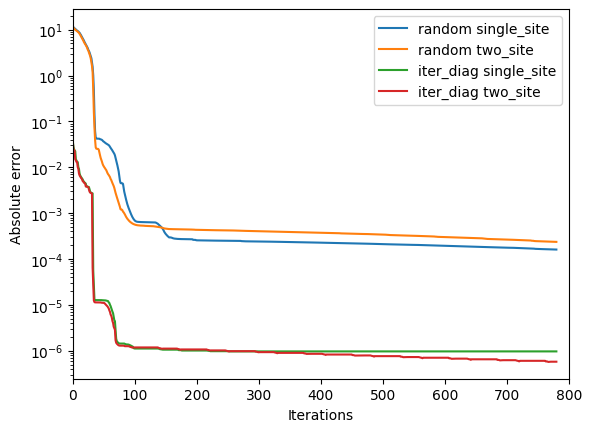

In [ ]:
fig, ax = plt.subplots(1, 1)

label1s = ["random", "iter_diag"]
label2s = ["single_site", "two_site"]

iterative_diags = [False, True]
two_sites = [False, True]

for it1, iterative_diag in enumerate(iterative_diags):
    for it2, two_site in enumerate(two_sites):
        energies_rand, times_rand, MPS_rand = DMRG(
            Hamiltonian = Hamiltonian_rand,
            NKeep = NKeep,
            NSweep = NSweep,
            Krylov_bases = Krylov_bases,
            Lanczos_cutoff = Lanczos_cutoff,
            iterative_diag = iterative_diag,
            two_site = two_site,
            verbose = verbose,
        )
        
        ax.plot(energies_rand - exact_gs_rand, label = f"{label1s[it1]} {label2s[it2]}")

ax.set_xlim(0, n_sites*2*NSweep)
ax.set_yscale("log")
ax.legend()

ax.set_xlabel(r"Iterations")
ax.set_ylabel(r"Absolute error")

The random initialization takes much longer to saturate. Moreover, the absolute error is higher than that of the iterative diagonalization.

Krylov bases > 5 or

Lanczos error < 1e-4

makes the code numerically unstable.